<a href="https://colab.research.google.com/github/Nhatnguyen2001/AI_Exercise/blob/main/robot_3dof_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

In [ ]:
import matplotlib.pyplot as plt
import math
import csv
import numpy as np
u=[]
z=[]
for i in range(0,181,3):
  for j in range(0,181,3):
    for k in range(0,181,3):
        x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))+30*math.cos(math.radians(i+j+k))
        y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))+30*math.sin(math.radians(i+j+k))
        t=k+j+i
        z.append(np.array((i,j,k,x,y,t)))
#print(u)

In [ ]:
header = ['anpha', 'beta','gamma', 'x', 'y','phi']
with open('robot_3b.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)

In [ ]:
data = pd.read_csv('robot_3b.csv')
data.shape
numpy_dataset = data.values

In [ ]:
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
print("Original data is:",x_train)
print("Shape of data is: ",x_train.shape)

Original data is: [[ 17.73723645 115.25310449  99.        ]
 [-80.2312414   45.77152614 186.        ]
 [ -6.8607741   21.18887773 306.        ]
 ...
 [-19.05472155   0.40664224 285.        ]
 [ 26.80399145  -5.23430684 297.        ]
 [-14.37282343  57.72832772 225.        ]]
Shape of data is:  (5629128, 3)


In [ ]:
print("Original data is:",y_train)
print("Shape of data is: ",y_train.shape)

Original data is: [[ 66.  21.  12.]
 [102.  78.   6.]
 [ 72. 111. 123.]
 ...
 [ 81. 129.  75.]
 [  6. 150. 141.]
 [ 60.  57. 108.]]
Shape of data is:  (5629128, 3)


In [ ]:
model = Sequential() 
model.add(Dense(32, activation='relu', input_shape = (3,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                128       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 4,419
Trainable params: 4,419
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
35183/35183 [==============================] - 155s 4ms/step - loss: 118.0631 - acc: 0.9214 - val_loss: 31.1619 - val_acc: 0.9577
Epoch 2/10
35183/35183 [===================

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])

sai so kiem tra la 31.36914825439453
do chinh xac kiem tra 0.9535722136497498


[[ 26.887266 153.01984  140.1237  ]
 [ 74.20021   19.02117  118.51005 ]
 [ 98.08242  124.61156   28.369785]
 ...
 [ 16.704924  13.513727  16.203625]
 [ 50.715134 127.32966   49.19667 ]
 [144.26944   -3.193832  87.59338 ]]


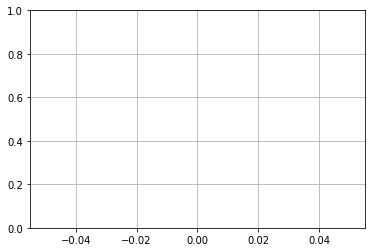

In [ ]:
import pandas as pd
score = model.evaluate(x_test,y_test,verbose = 0)
y_pred = model.predict(x_test)
print(y_pred)
pd.DataFrame(history.history)
plt.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


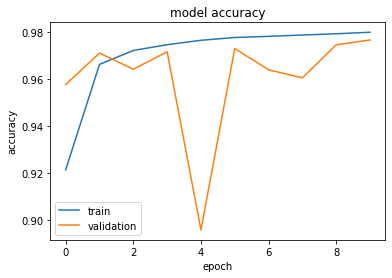

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

In [ ]:
Px_test_train = 20
Py_test_train = 50
phi = 90
print(Px_test_train,Py_test_train,phi)
test = model.predict([[Px_test_train,Py_test_train,phi]])
t1 = test[0][0]
t2 = test[0][1]
t3 = test[0][2]

x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))+30*math.cos(math.radians(t1+t2+t3))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))+30*math.sin(math.radians(t1+t2+t3))
print('x = ',x_1,'y = ',y_1)
print(t1,t2,t3)

20 50 90
x =  15.672294121444592 y =  47.19961340673495
-12.425701 147.2497 -35.308846


In [ ]:
model.save('Robot_3dof.h5')